# Энергия, вероятность, энтропия

На этом занятии мы поработаем с данными о динамике молекул и опишем наблюдаемые тенденции на языке свободной энергии.

Нам потребуются популярные библиотеки. NumPy для работы с данными и matplotlib для построения графиков.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Дан датасет -- зависимость значения торсионного угла, соответствующего вращению вдоль связи Cl-C-C-Cl в молекуле Cl-CH2-CH2-Cl, от времени, при температуре 300К.

In [3]:
! wget vsb.fbb.msu.ru/share/masters/c1_c3/cl.dat

--2024-12-29 14:23:39--  http://vsb.fbb.msu.ru/share/masters/c1_c3/cl.dat
Resolving vsb.fbb.msu.ru (vsb.fbb.msu.ru)... 93.180.63.165
Connecting to vsb.fbb.msu.ru (vsb.fbb.msu.ru)|93.180.63.165|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://vsb.fbb.msu.ru/share/masters/c1_c3/cl.dat [following]
--2024-12-29 14:23:39--  https://vsb.fbb.msu.ru/share/masters/c1_c3/cl.dat
Connecting to vsb.fbb.msu.ru (vsb.fbb.msu.ru)|93.180.63.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1614091 (1.5M) [application/octet-stream]
Saving to: ‘cl.dat’

cl.dat              100%[===================>]   1.54M  --.-KB/s    in 0.03s   

2024-12-29 14:23:40 (48.8 MB/s) - ‘cl.dat’ saved [1614091/1614091]



In [4]:
CV = np.genfromtxt('./cl.dat')

Значение угла дано в радианах, поэтому для простоты восприятия переведем его в градусы. Дополнительно в колонке 2 дано значение расстояния между двумя атомами хлора. Его также можно использовать как репортерную переменную, показывающую нам, что с молекулой происходят динамические изменения. Значение расстояния дано в нанометрах, переведем его в ангстремы.

In [5]:
time = CV[:,0]
torsion = np.rad2deg(CV[:,1])
distance = CV[:,2]*10

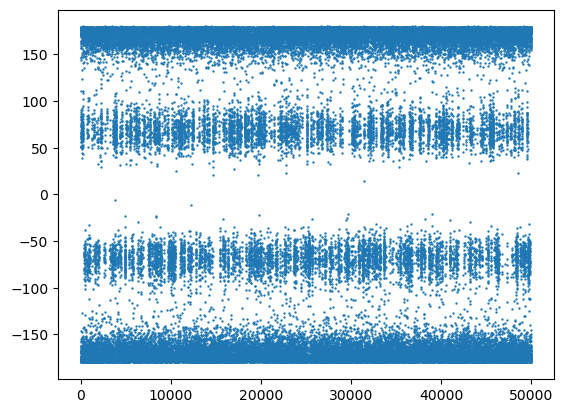

In [6]:
fig,ax = plt.subplots()
ax.scatter(CV[:,0], torsion, s=0.5)
fig.show()

Видно, что большинство значений сосредоточено в районе 180 градусов, т.е. два тяжелых атома Cl находятся в анти-положении друг относительно друга. Обсудите, почему это так с точки зрения химии. Что представляют собой два других явно выделяющихся визуально состояния?

180 градусов и -180 это одно и то же, и учитывая, что два других состояния получаются отклонением от исходного (см. населенность переходных состояний), нам будет удобнее перестроить отображение, сдвинув ось Y.

In [7]:
torsion[torsion < 0] += 360

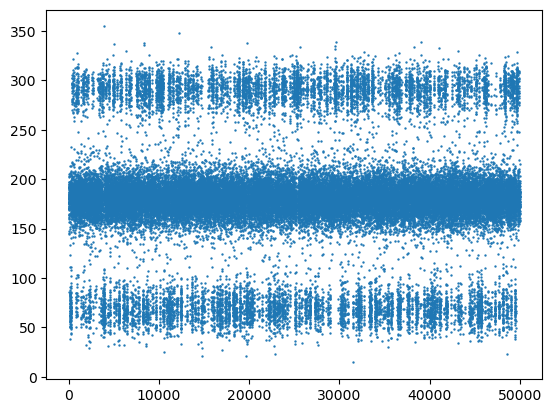

In [8]:
fig,ax = plt.subplots()
ax.scatter(CV[:,0], torsion, s=0.5)

Изучим населенности состояний

In [9]:
grid = np.linspace(0,360,121)
H = np.histogram(torsion, bins=grid, density=True)

<BarContainer object of 120 artists>

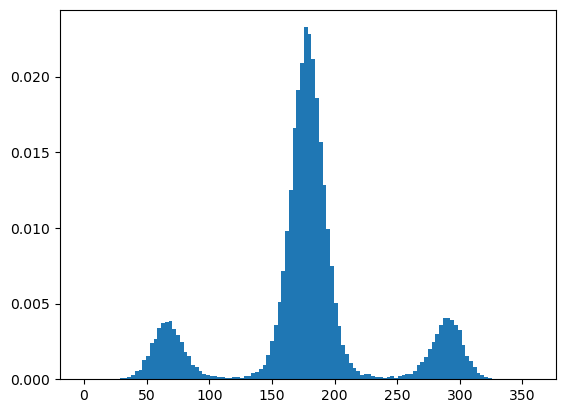

In [10]:
fig,ax = plt.subplots()
ax.bar(H[1][:-1], H[0], width=3)

Так как мы использовали в построении гистограммы параметр density=True, результирующие значения показывают вероятность наблюдения угла в данном диапозоне значений. Свободная энергия неразрывно связана с вероятностью. Вычислим ее значения с помощью формулы.

Вычислять будем в ккал/моль, и при 300К RT=0.593 ккал/моль.

/tmp/ipykernel_640381/4133267350.py:2: RuntimeWarning: divide by zero encountered in log
  E = -0.593 * np.log(H[0])


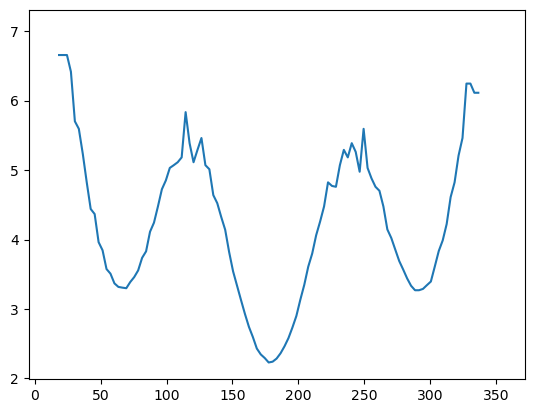

In [11]:
fig,ax = plt.subplots()
E = -0.593 * np.log(H[0])
ax.plot(H[1][:-1]+0.5, E)

Абсолютные значения энергии в данном случае не несут информации. Важны относительные значения. Также вы можете наблюдать, что переходным состояниям соответствует очень неровный профиль энергии. В данном случае это не значит, что действительно имеются локальные минимумы. В данном случае это следствие оценки вероятности и, как следствие, энергии по крайне малому числу измерений.

(*) Для интересующихся -- разбейте данные на отдельные окна и постройте оценку профиля энергии по ним. Оцените неопределенность оценки в каждой точке профиля.

Теперь вычислим разницу в энергии состояний. Для этого нужно сначала определиться, что такое состояние. Мы уже работаем с макросостояниями, так как рассматриваем разбиение, опираясь на производную функцию (значение торсионного угла). Но макросостояния могут быть и комбинациями макросостояний, следствием перевода непрерывного рассмотрения (как в случае с торсионным углом) к дискретному. В данном случае мы можем разделить все пространство на 3 состояния, ориентируясь на форму профиля и беря в качестве разделяющих значений значения локальных максимумов.


На практике это делается в соответствии с тем, какие величины измеримы в соответствующем эксперименте; релевантны в соответствующем биологическом процессе. Предположим, что все три взаиморасположения хлоров приводят к различному биологическому ответу, то есть эти три состояния различимы в эксперименте. В таком случае наблюдаемый исход эксперимента будет связан с относительными вероятностями (а значит, энергиями) этих состояний по отдельности. Оценим их двумя способами.

1. Приблизительный -- по отдельным точкам, локальным минимумам впадин на профиле, соответствующим отдельным состояниям.
2. Точный -- суммируя вероятности всех состояний, которые мы поместили внутрь данного состояния.

In [12]:
min_G_state_1 = np.min(E[H[1][:-1] < 120])
min_G_state_2 = np.min(E[np.abs(H[1][:-1]-180) < 60])
min_G_state_3 = np.min(E[H[1][:-1] > 240])

In [13]:
G_state_1 = -0.593 * np.log(np.sum(H[0][H[1][:-1] < 120]))
G_state_2 = -0.593 * np.log(np.sum(H[0][np.abs(H[1][:-1]-180) < 60]))
G_state_3 = -0.593 * np.log(np.sum(H[0][H[1][:-1] > 240]))

Посмотрим, насколько данные значения близки друг другу. Видим, что в данном случае действительно можно делать выводы о термодинамике системы путем анализа отдельных состояний. Это происходит, потому что энтропии этих состояний (относительно выбранной переменной) в данном случае сопоставимы. Энтропия в данном случае выражается в виде ширины соответствующей впадины на профиле энергии.

In [14]:
print(min_G_state_1 - min_G_state_2, G_state_1 - G_state_2)
print(min_G_state_3 - min_G_state_2, G_state_3 - G_state_2)

1.069179237430928 1.0815692122230125
1.0400011722484117 1.0523477152858092


(*) Сделав несколько реконструкций профиля, получите так же несколько оценок энергий, чтобы помимо значения иметь и меру неопределенности данного значения. Наблюдается ли статистически достоверная разница между значениями, оцененными двумя разными способами?

Однако мы могли бы выбрать другую репортерную переменную, чтобы изучать наш процесс. Расстояние между атомами хлора. Такой выбор мог быть релевантен, если для некого биологического процесса важна только мера удаленности этих двух атомов, чтобы этот процесс привел к наблюдаемому эффекту. Можно представить себе ситуацию, в которой существует белок, способный связывать только син-конформацию нашей молекулы, но неважно, какую из двух, так как это достигается наличием двух сайтов связывания хлоров, а положение центральной части молекулы относительно белка не влияет на силу связывания.

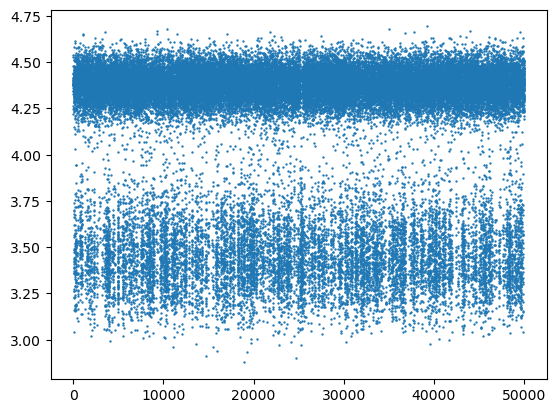

In [15]:
fig,ax = plt.subplots()
ax.scatter(time, distance, s=0.5)

Повторим все расчеты

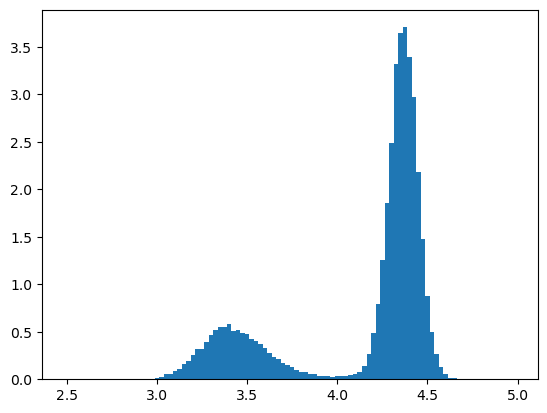

In [16]:
grid = np.linspace(2.5,5.0,101)
H = np.histogram(distance, bins=grid, density=True)
fig,ax = plt.subplots()
ax.bar(H[1][:-1], H[0], width=0.025)
fig.show()

/tmp/ipykernel_640381/1728456608.py:2: RuntimeWarning: divide by zero encountered in log
  E = -0.593 * np.log(H[0])


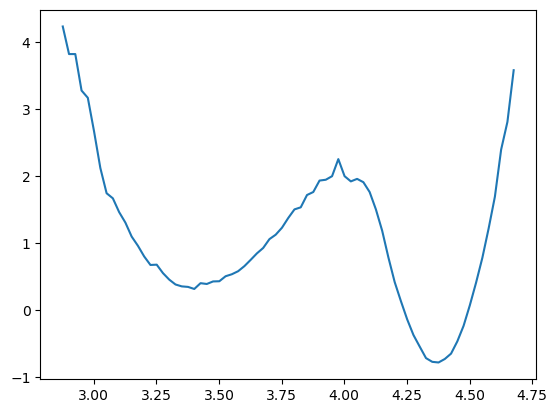

In [17]:
fig,ax = plt.subplots()
E = -0.593 * np.log(H[0])
ax.plot(H[1][:-1]+0.00125, E)
fig.show()

In [18]:
min_G_state_1 = np.min(E[H[1][:-1] < 3.9])
min_G_state_2 = np.min(E[H[1][:-1] > 3.9])
print(min_G_state_1 - min_G_state_2)

1.0951300114288174


In [19]:
G_state_1 = -0.593 * np.log(np.sum(H[0][H[1][:-1] < 3.9]))
G_state_2 = -0.593 * np.log(np.sum(H[0][H[1][:-1] > 3.9]))
print(G_state_1 - G_state_2)

0.6732625266330052


В данном случае два способа оценить разницу в энергиях дают значительно различающиеся результаты -- вследствие различной энтропии этих состояний относительно выбранной репортерной переменной.

В реальной работе структурного биолога нет информации об "истинной" динамике отдельных атомов с временным разрешением на уровне пикосекунд. Такую информацию можно только сымитировать методами молекулярного моделирования. Гораздо чаще приходится иметь дело со статичными моделями, представляющими собой отдельные стабильные состояния, минимумы энергии, и делать выводы, релевантные для биологии в целом исходя из них, путем построения ментальной модели динамики. Как показывает наш игрушечный пример в этом занятии, в этом случае важно оценивать, прикидывать, насколько данные состояния уникальны с точки зрения взаиморасположения атомов, или же могут быть достигнуты различными способами -- тогда како